In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 50)

# Hyporthesis 3. the more minutes you play the more df you make. I would also add the less aces you make. 

In [3]:
import os
import pandas as pd
os.chdir('/Users/johnngai/Desktop/final_project/ATP_matches_past_10_years_record/')

main_data = pd.read_csv('grand_slam_database.csv')

In [4]:
main_data = main_data.drop(['Unnamed: 0'], axis=1)

In [5]:
# Creating a new df with the stats we need for question 3 (minutes, total points, total df, total aces, % of df, % of aces)

grand_slam_q3 = main_data[['minutes']]

In [6]:
grand_slam_q3['total_points'] = main_data.apply(lambda row: row.w_svpt + row.l_svpt, axis=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
grand_slam_q3['total_aces'] = main_data.apply(lambda row: row.w_ace + row.l_ace, axis=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
grand_slam_q3['total_df'] = main_data.apply(lambda row: row.w_df + row.l_df, axis=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
grand_slam_q3['percentage_aces'] = grand_slam_q3.apply(lambda row: row.total_aces / row.total_points * 100, axis=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
grand_slam_q3['percentage_df'] = grand_slam_q3.apply(lambda row: row.total_df / row.total_points * 100, axis=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
# Round the figure to 1 decimal place
grand_slam_q3 = grand_slam_q3.round({'percentage_aces': 1, 'percentage_df': 1})

In [12]:
# Removing an outlier (600 minutes match) to make the graph more visual

from scipy import stats

grand_slam_q3 = grand_slam_q3[(np.abs(stats.zscore(grand_slam_q3)) < 8).all(axis=1)]

In [13]:
grand_slam_q3.head(3)

,minutes,total_points,total_aces,total_df,percentage_aces,percentage_df
0,94,127,3,2,2.4,1.6
1,225,306,21,10,6.9,3.3
2,239,372,20,15,5.4,4.0


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


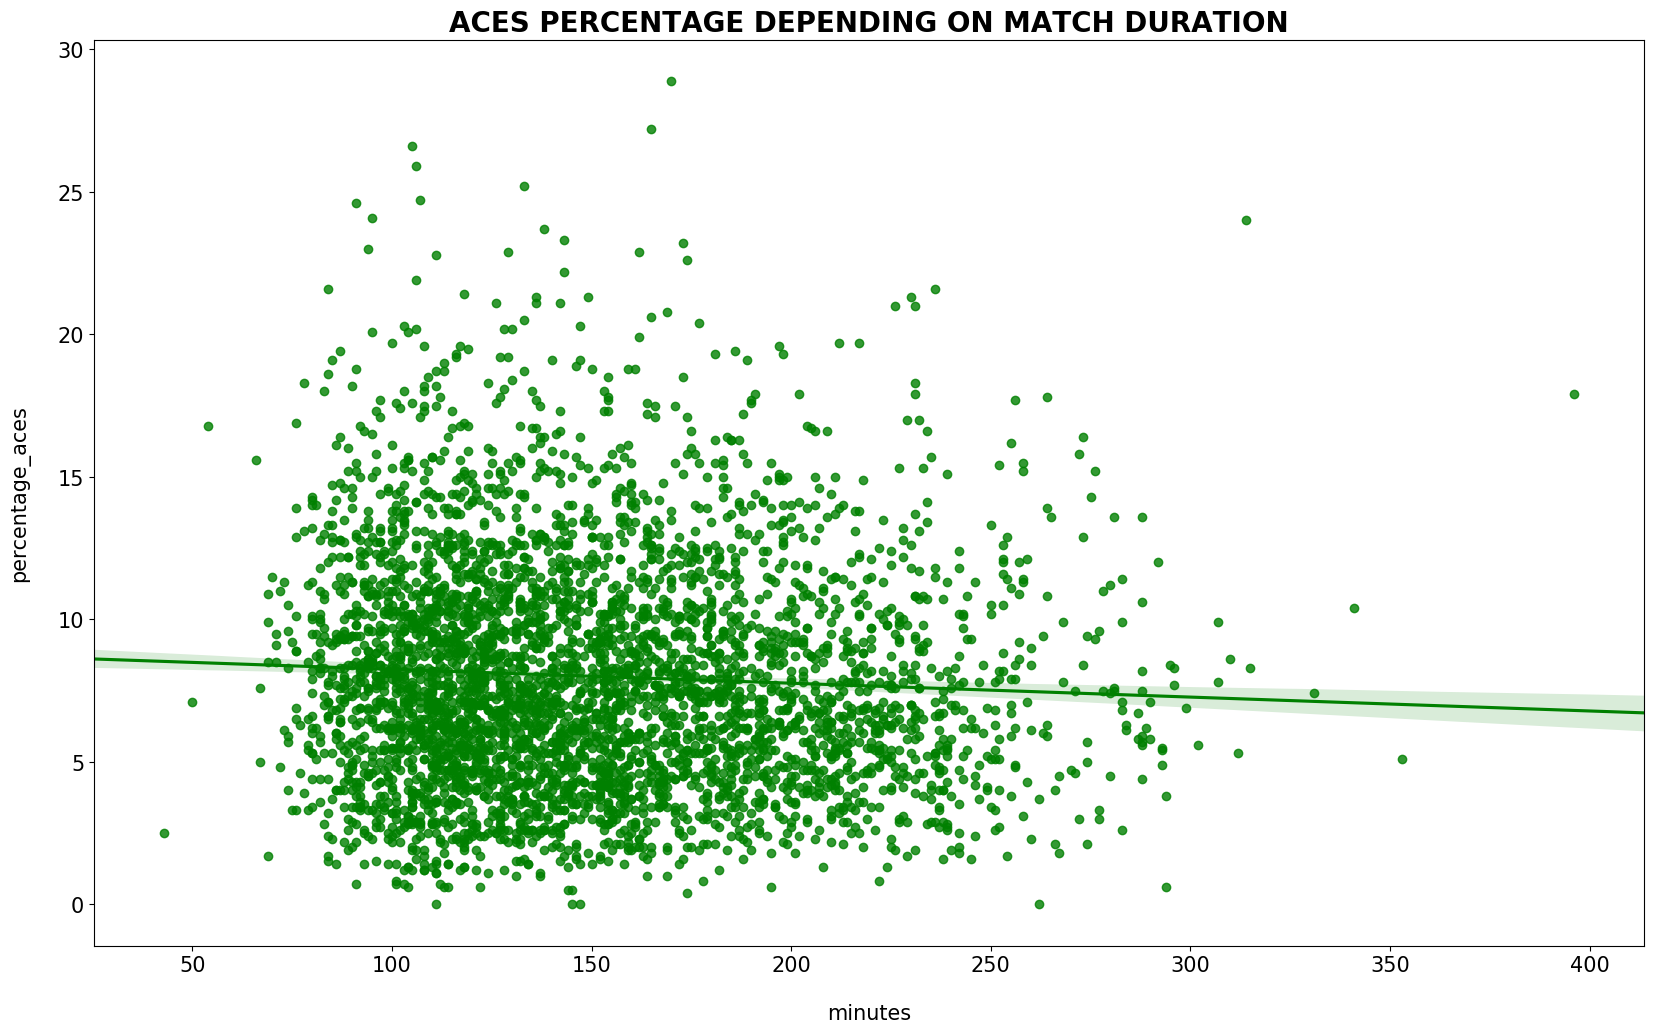

In [14]:
# Scatter plot with regression line and correlation coefficient for Aces percentage and minutes

plt.figure(figsize=(20, 12), dpi=100)
plt.title('ACES PERCENTAGE DEPENDING ON MATCH DURATION', fontweight = 600, fontsize=20)
plt.xlabel('Minutes', fontsize=15, labelpad=20)
plt.ylabel('% of Aces', fontsize=15, labelpad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
x, y = grand_slam_q3['minutes'], grand_slam_q3['percentage_aces']
ax = sns.regplot(x=x, y=y, color='green')

In [15]:
# Find the correlation index
grand_slam_q3[['minutes', 'percentage_aces']].corr()

,minutes,percentage_aces
minutes,1.000000,-0.056892
percentage_aces,-0.056892,1.000000


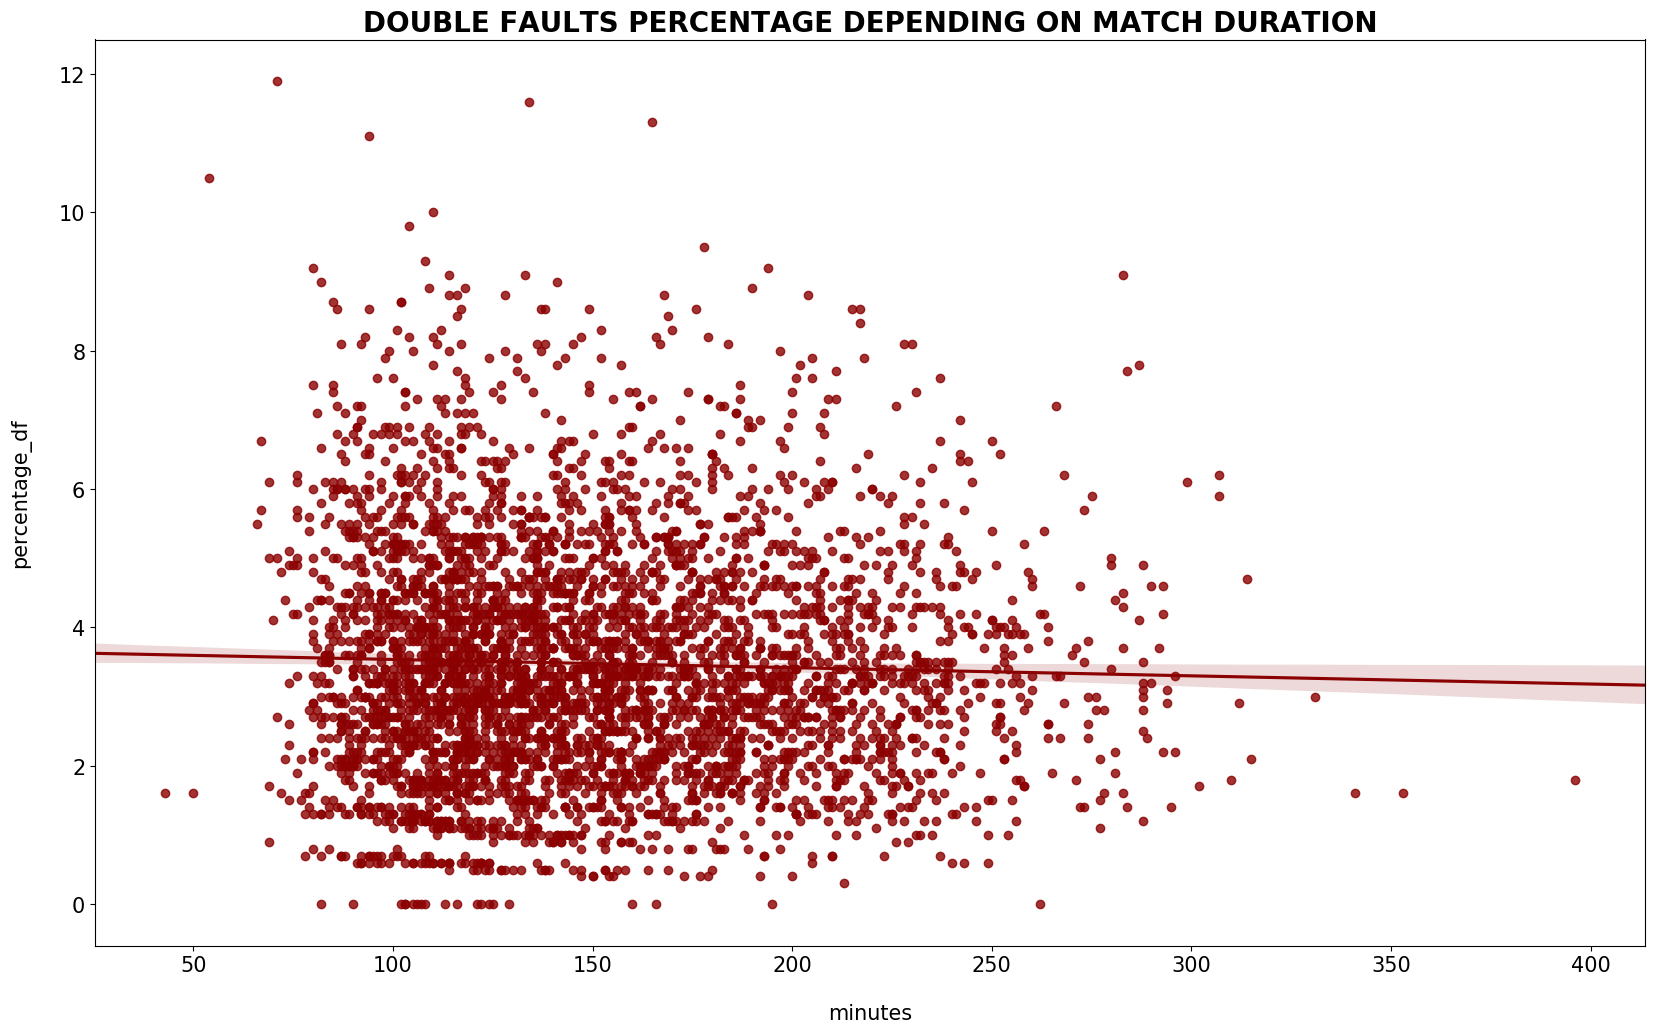

In [16]:
# Scatter plot with regression line and correlation coefficient for Double Fault percentage and minutes


plt.figure(figsize=(20, 12), dpi=100)
plt.title('DOUBLE FAULTS PERCENTAGE DEPENDING ON MATCH DURATION', fontweight = 600, fontsize=20)
plt.xlabel('Minutes', fontsize=15, labelpad=20)
plt.ylabel('% of Double Faults', fontsize=15, labelpad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
x, y = grand_slam_q3['minutes'], grand_slam_q3['percentage_df']
ax = sns.regplot(x=x, y=y, color='darkred')

## Analysis in absolute terms

In [17]:
# Find the correlation index
grand_slam_q3[['minutes', 'percentage_df']].corr()

,minutes,percentage_df
minutes,1.000000,-0.033059
percentage_df,-0.033059,1.000000


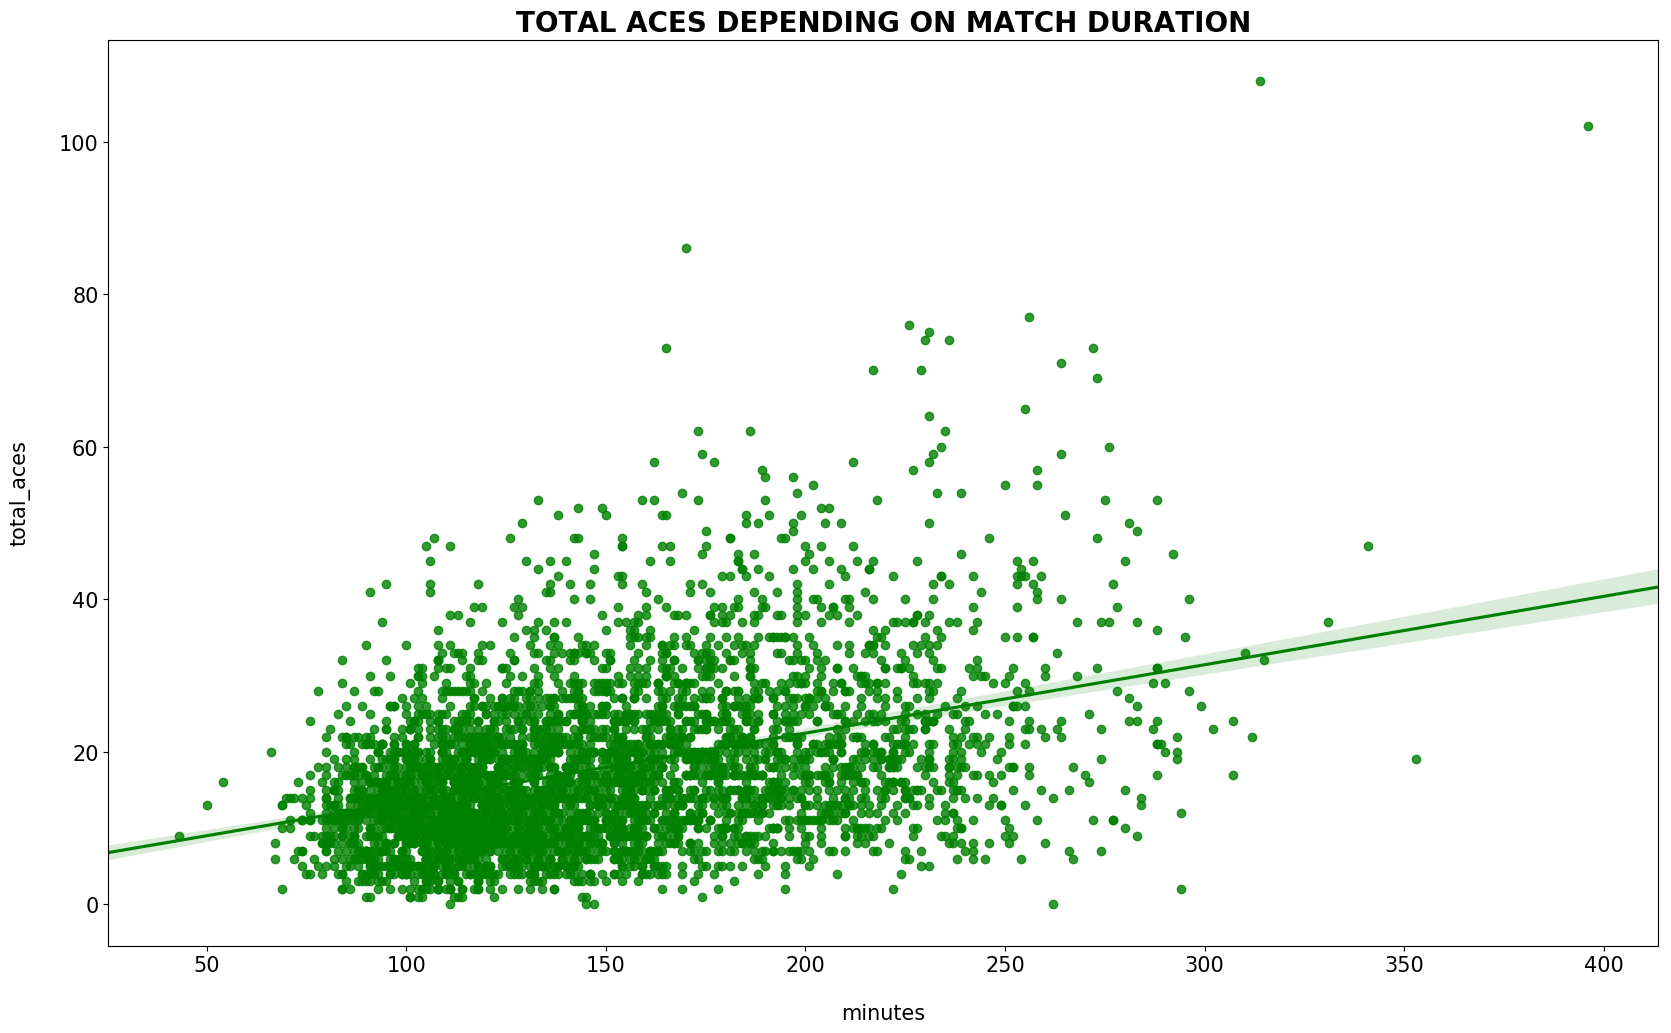

In [18]:
# Scatter plot with regression line and correlation coefficient for Total Aces and minutes

plt.figure(figsize=(20, 12), dpi=100)
plt.title('TOTAL ACES DEPENDING ON MATCH DURATION', fontweight = 600, fontsize=20)
plt.xlabel('Minutes', fontsize=15, labelpad=20)
plt.ylabel('Total Aces', fontsize=15, labelpad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
x, y = grand_slam_q3['minutes'], grand_slam_q3['total_aces']
ax = sns.regplot(x=x, y=y, color='green')

In [19]:
grand_slam_q3[['minutes', 'total_aces']].corr()

,minutes,total_aces
minutes,1.000000,0.387146
total_aces,0.387146,1.000000


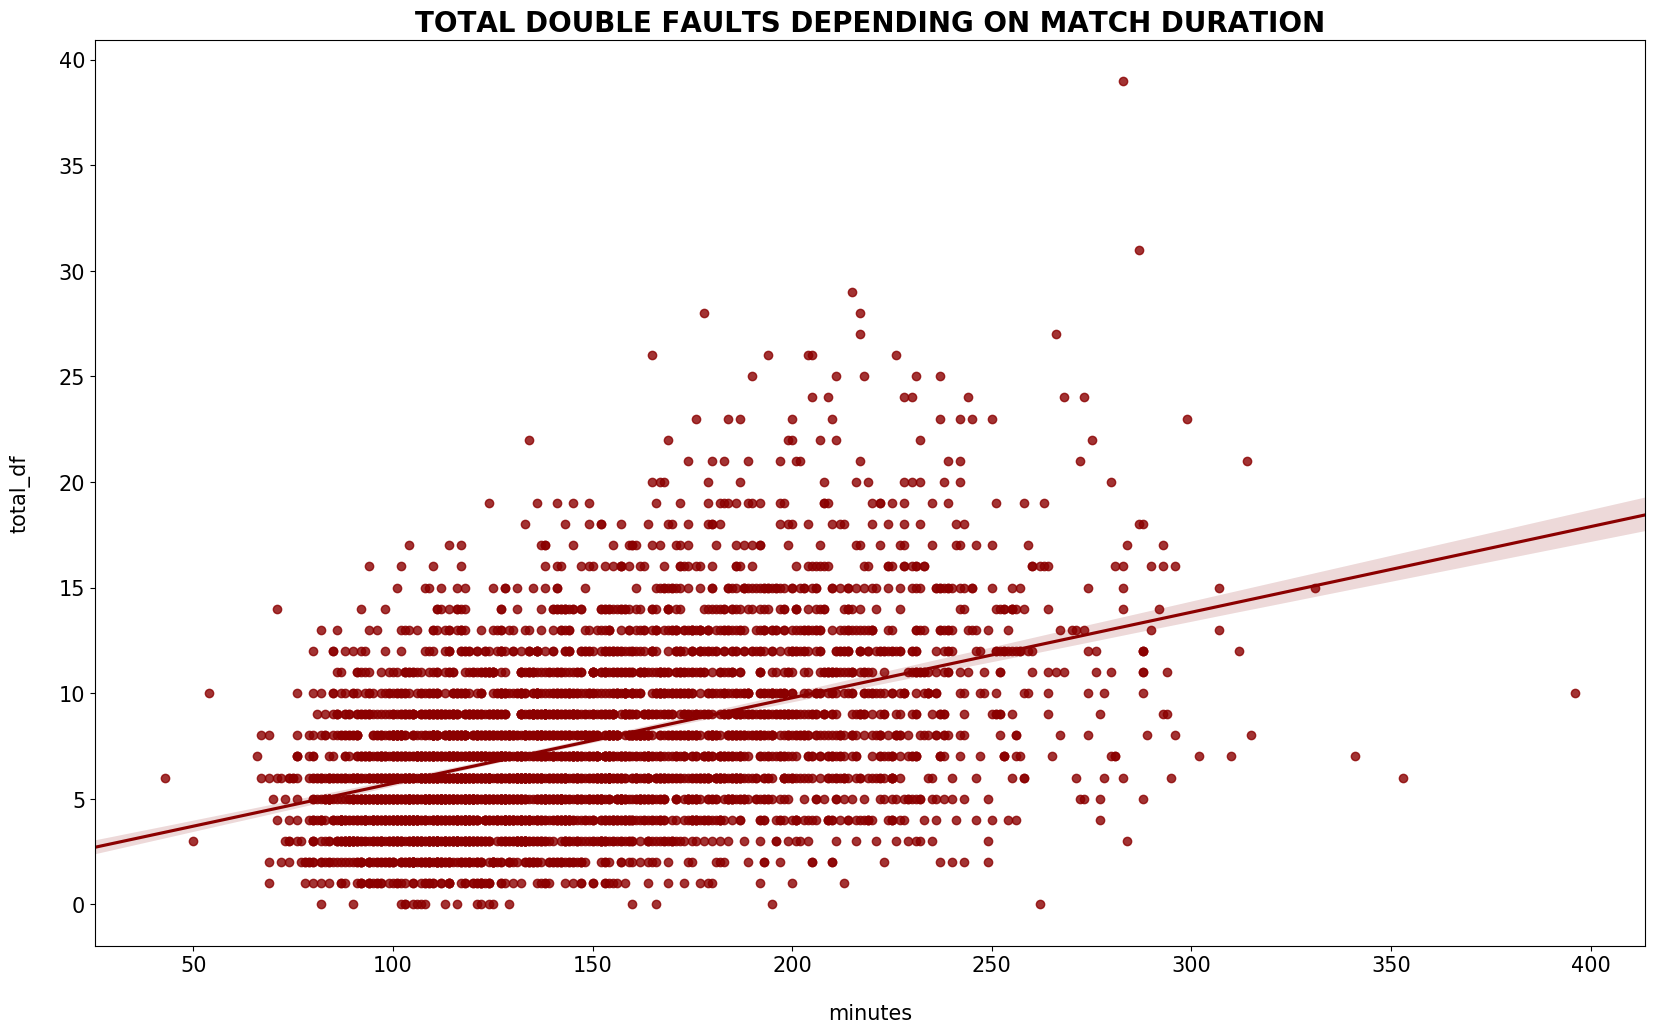

In [20]:
# Scatter plot with regression line and correlation coefficient for Total df and minutes

plt.figure(figsize=(20, 12), dpi=100)
plt.title('TOTAL DOUBLE FAULTS DEPENDING ON MATCH DURATION', fontweight = 600, fontsize=20)
plt.xlabel('Minutes', fontsize=15, labelpad=20)
plt.ylabel('Total Double Faults', fontsize=15, labelpad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
x, y = grand_slam_q3['minutes'], grand_slam_q3['total_df']
ax = sns.regplot(x=x, y=y, color='darkred')

In [21]:
grand_slam_q3[['minutes', 'total_df']].corr()

,minutes,total_df
minutes,1.000000,0.438751
total_df,0.438751,1.000000


# Introduction - No. of aces and No. of double fault per match on different court surface 

In [22]:
main_data.head()

,tourney_id,tourney_name,surface,tourney_level,tourney_date,winner_name,winner_hand,winner_ht,winner_ioc,winner_rank,loser_name,loser_hand,loser_ht,loser_ioc,loser_rank,score,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,1st_set,2nd_set,3rd_set,4th_set,5th_set,total_points_played,duration_of_each_point,minutes_bin
0,2018-580,Australian Open,Hard,G,2018-01-15,Rafael Nadal,L,185,ESP,1,Victor Estrella,R,173,DOM,79,6-1 6-1 6-1,R128,94,2,1,66,48,37,12,11,5,6,1,1,61,40,19,5,10,4,12,6-1,6-1,6-1,NaN,NaN,127,0.740157,90-105
1,2018-580,Australian Open,Hard,G,2018-01-15,Damir Dzumhur,R,172,BIH,30,Paolo Lorenzi,R,183,ITA,44,3-6 2-6 7-6(5) 6-2 6-4,R128,225,3,5,127,74,58,27,23,4,9,18,5,179,92,68,41,24,8,13,3-6,2-6,7-6(5),6-2,6-4,306,0.735294,>210
2,2018-580,Australian Open,Hard,G,2018-01-15,Diego Sebastian Schwartzman,R,170,ARG,26,Dusan Lajovic,R,180,SRB,75,2-6 6-3 5-7 6-4 11-9,R128,239,14,7,189,109,68,40,30,14,25,6,8,183,126,78,24,29,13,24,2-6,6-3,5-7,6-4,11-9,372,0.642473,>210
3,2018-580,Australian Open,Hard,G,2018-01-15,Alexandr Dolgopolov,R,180,UKR,37,Andreas Haider Maurer,R,190,AUT,448,7-6(3) 6-3 6-4,R128,124,11,4,88,46,36,19,15,4,8,11,7,112,63,40,17,16,9,16,7-6(3),6-3,6-4,NaN,NaN,200,0.620000,120-135
4,2018-580,Australian Open,Hard,G,2018-01-15,Matthew Ebden,R,188,AUS,78,John Isner,R,206,USA,16,6-4 3-6 6-3 6-3,R128,124,13,4,97,68,57,18,18,2,3,24,2,105,68,48,20,19,0,4,6-4,3-6,6-3,6-3,NaN,202,0.613861,120-135


In [23]:
grand_slam_surface = main_data[['surface']]

In [24]:
grand_slam_surface['total_ace'] = main_data.apply(lambda row: row.w_ace + row.l_ace, axis=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
grand_slam_surface['total_df'] = main_data.apply(lambda row: row.w_df + row.l_df, axis=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
match_count=grand_slam_surface.groupby(['surface']).mean()

In [27]:
# Preview of dataframe for plot
match_count

,total_ace,total_df
surface,,
Clay,13.270320,6.629224
Grass,23.249497,7.527163
Hard,18.253128,8.576997


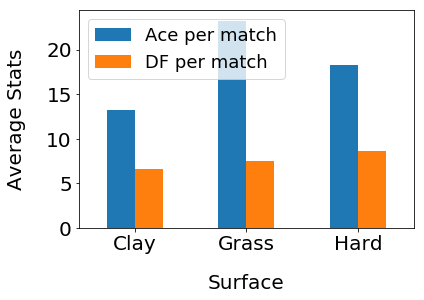

In [28]:

import matplotlib.pyplot as plt
ax=match_count.plot.bar(rot=0)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Surface', fontsize=20, labelpad=20)
plt.ylabel('Average Stats', fontsize=20, labelpad=20)
plt.legend(['Ace per match', 'DF per match'], fontsize=18)


## Introduction - Avg no. of ace in Grand Slam tournament over past 10 years

In [29]:
# Combine main data frame with gran_slam_surface
full=pd.concat([grand_slam_surface,main_data],axis=1)

In [30]:
# Turn tourney_id into year
full['tourney_id']=full['tourney_id'].apply(lambda x: x.split('-')[0])

In [31]:
# take online the needed columns for plot
plot_data=full.iloc[:,:5]

In [32]:
# Preview of dataframe for plot
plot_data.head(2)

,surface,total_ace,total_df,tourney_id,tourney_name
0,Hard,3,2,2018,Australian Open
1,Hard,21,10,2018,Australian Open


In [33]:
# Perform groupby to get the mean values of ace and df
plot = plot_data.groupby(['tourney_name','tourney_id']).mean().reset_index()

In [34]:
# Preview
plot.head()

,tourney_name,tourney_id,total_ace,total_df
0,Australian Open,2008,15.727273,7.223140
1,Australian Open,2009,16.268908,7.260504
2,Australian Open,2010,17.406780,7.728814
3,Australian Open,2011,17.418033,6.901639
4,Australian Open,2012,15.852174,7.773913


In [35]:
# Calculate the missing data in year 2015 from data online and add the two rows back
d_w_15={'tourney_name':'Wimbledon','tourney_id': '2015', 'total_ace': [23.567893],'total_df':[7.134659]}
w_15=pd.DataFrame(data=d_w_15)


d_u_15={'tourney_name':'US Open','tourney_id': '2015', 'total_ace': [17.057867],'total_df':[10.458923]}
u_15=pd.DataFrame(data=d_u_15)

In [36]:
plot_update1=pd.concat([plot,w_15],axis=0)

In [37]:
plot_update2=pd.concat([plot_update1,u_15],axis=0)

In [38]:
# Verify
plot_update2.tail(3)

,tourney_name,tourney_id,total_ace,total_df
41,Wimbledon,2018,25.981481,8.740741
0,Wimbledon,2015,23.567893,7.134659
0,US Open,2015,17.057867,10.458923


In [39]:
line_plot=plot_update2.groupby(['tourney_name','tourney_id']).mean().reset_index()

In [40]:
line_plot

,tourney_name,tourney_id,total_ace,total_df
0,Australian Open,2008,15.727273,7.223140
1,Australian Open,2009,16.268908,7.260504
2,Australian Open,2010,17.406780,7.728814
3,Australian Open,2011,17.418033,6.901639
4,Australian Open,2012,15.852174,7.773913
5,Australian Open,2013,18.348624,6.981651
6,Australian Open,2014,19.138298,8.478723
7,Australian Open,2015,20.967742,7.516129
8,Australian Open,2016,22.631579,8.368421
9,Australian Open,2017,21.597561,8.585366


In [41]:
# Perform lineplot

import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import cufflinks as cf
from ipywidgets import interact

cf.go_offline()

# Initiate line plot objects, one for each tournament
trace0 = go.Scatter(
    x = line_plot[line_plot.tourney_name=='Australian Open'].tourney_id,
    y = line_plot[line_plot.tourney_name=='Australian Open'].total_ace,
# Format the plot in terms of title and line style    
    mode = 'lines+markers',
    name = 'Australian Open',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 6,
                )
)

trace1 = go.Scatter(
    x = line_plot[line_plot.tourney_name=='Roland Garros'].tourney_id,
    y = line_plot[line_plot.tourney_name=='Roland Garros'].total_ace,
    mode = 'lines+markers',
    name = 'Roland Garros',
    line = dict(
        color = ('rgb(255, 165, 0)'),
        width = 6,
                )
)

trace2 = go.Scatter(
    x = line_plot[line_plot.tourney_name=='US Open'].tourney_id,
    y = line_plot[line_plot.tourney_name=='US Open'].total_ace,
    mode = 'lines+markers',
    name = 'US Open',
    line = dict(
        color = ('rgb(255, 0, 0)'),
        width = 6,
                )
)

trace3 = go.Scatter(
    x = line_plot[line_plot.tourney_name=='Wimbledon'].tourney_id,
    y = line_plot[line_plot.tourney_name=='Wimbledon'].total_ace,
    mode = 'lines+markers',
    name = 'Wimbledon',
    line = dict(
        color = ('rgb(34, 139, 34)'),
        width = 6,
                )
)

# Initiate the layout object, set title, x & y label of plot
layout = dict(title = 'Trend of ace across Grand Slam tournament',
               xaxis = dict(title= 'Year'),
               yaxis = dict(title= 'Avg. no. of Ace'))

data = [trace0,trace1,trace2,trace3]

# Execute plot
fig = go.Figure(data=data, layout=layout)
plt.figure(figsize=(20,20))


fig.iplot(filename='line-mode')

<Figure size 1440x1440 with 0 Axes>